# Spoken Lexical Word Frequency
Incremental models investigating the effect of spoken frequency, using frequency norms from the COCA Spoken corpus. </br>
Other word norms and a binary regressor coding for the presence of speech in the stimulus are added as covariates.

In [1]:
%load_ext autoreload
%autoreload 2
from tools.create import create_incremental_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from tools.viz import (plot_regressor, plot_metrics, 
                       plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [2]:
api = Neuroscout()

## Define predictors and confounds

In [56]:
predictor_sets = [
    ['massiveauditorylexicaldecision_FreqCOCAspok', 'speech'],
    ['massiveauditorylexicaldecision_PhonLev', 'text_length'],
    ['massiveauditorylexicaldecision_NumSylls', 'massiveauditorylexicaldecision_NumPhones', 'massiveauditorylexicaldecision_Duration', 'concreteness_Conc.M']
]
predictors = [item for sublist in predictor_sets for item in sublist]
transform_variables = list(set(predictors) - set(['speech', 'text_length']))

In [51]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

TODO
- Re-run with this (for both frequencies) (not super high priority)

(speech + freq_spoken) + (text_length, PhonLev) + everything

(speech + freq_written) + (text_length, PhonLev) + everything

(concreteness + speech) (should already be run 

In [55]:
incremental_models.keys()

dict_keys(['massiveauditorylexicaldecision_FreqCOCAspok+speech', 'massiveauditorylexicaldecision_FreqCOCAspok+speech+massiveauditorylexicaldecision_NumSylls+massiveauditorylexicaldecision_NumPhones+massiveauditorylexicaldecision_Duration+text_length+massiveauditorylexicaldecision_PhonLev+concreteness_Conc.M'])

## Create models

In [5]:
transformations = [
    {"Name": "Scale", "Demean": True, "Rescale": True, "ReplaceNA": "after", "Input": [p],"Output": [p]} 
    for p in transform_variables
]

In [57]:
incremental_models = create_incremental_models(predictor_sets, confounds, 
                                               transformations=transformations, include_single_pred=True)

Dataset: studyforrest, Predictors: ['massiveauditorylexicaldecision_FreqCOCAspok', 'speech'] Not all named predictors could be found for the specified runs.
Dataset: studyforrest, Predictors: ['massiveauditorylexicaldecision_FreqCOCAspok', 'speech', 'massiveauditorylexicaldecision_PhonLev', 'text_length'] Not all named predictors could be found for the specified runs.
Dataset: studyforrest, Predictors: ['massiveauditorylexicaldecision_FreqCOCAspok', 'speech', 'massiveauditorylexicaldecision_PhonLev', 'text_length', 'massiveauditorylexicaldecision_NumSylls', 'massiveauditorylexicaldecision_NumPhones', 'massiveauditorylexicaldecision_Duration', 'concreteness_Conc.M'] Not all named predictors could be found for the specified runs.


In [7]:
filename = Path('models') / 'lexical_frequency_spoken_incremental.json'

In [64]:
# dump_collection(incremental_models, str(filename))

In [9]:
incremental_models = load_collection(str(filename))

## Generate reports

In [72]:
for (pred, dataset, task), model in flatten_collection(incremental_models):
    try:
        model.get_report(loop_wait=False)
    except:
        model.generate_report(run_id=model.runs[0])

## Inspect regressors

In [10]:
df = _extract_regressors(incremental_models)

/home/alejandro/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


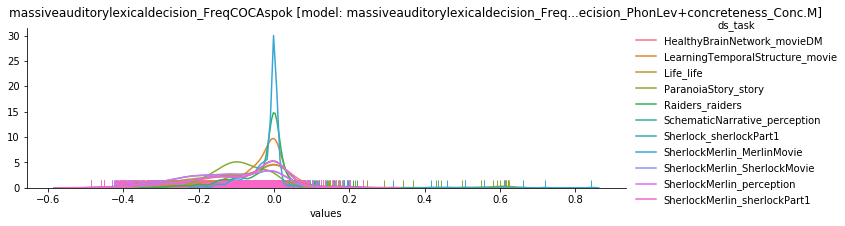

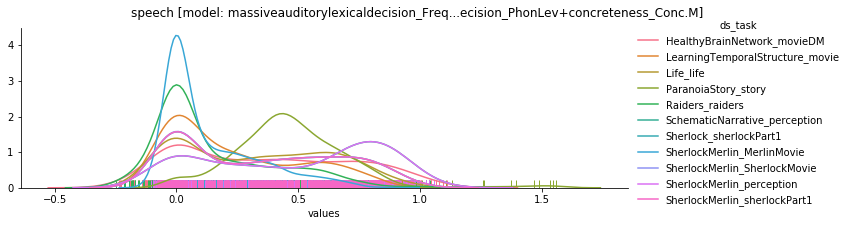

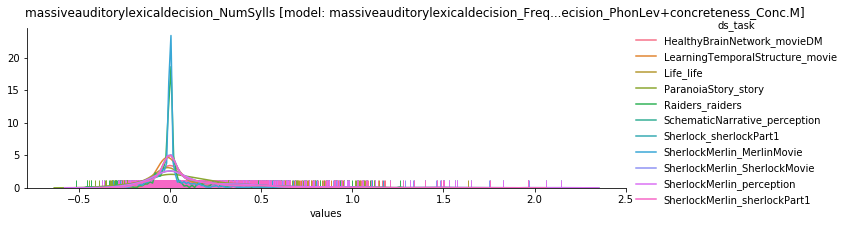

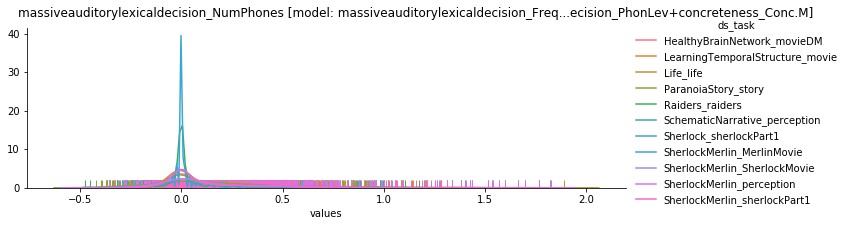

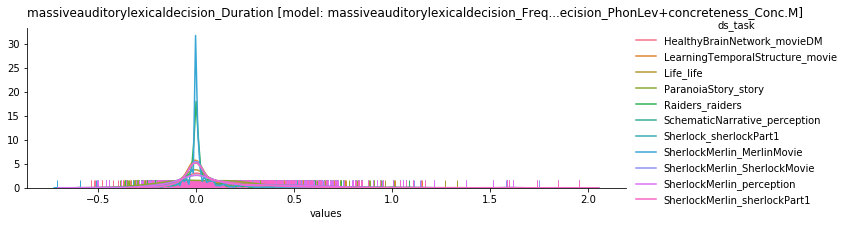

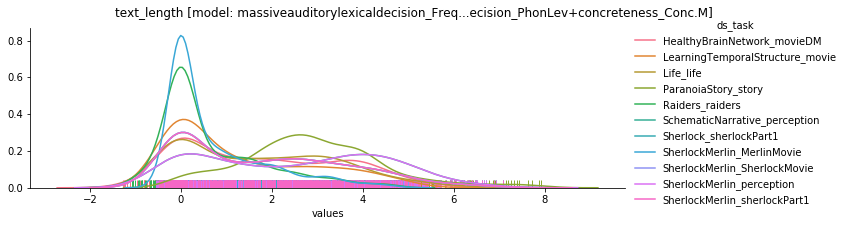

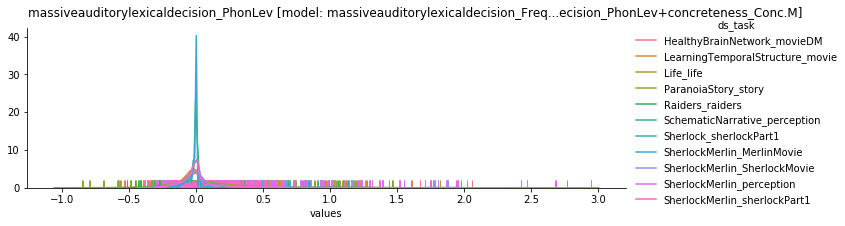

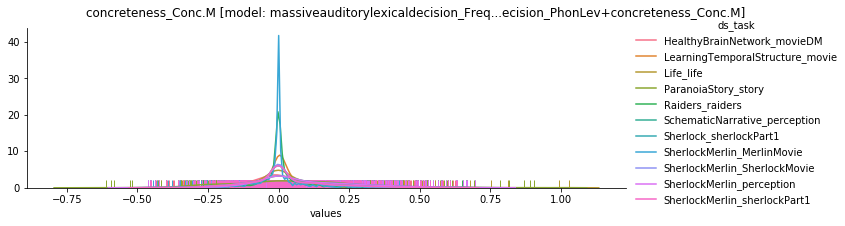

In [11]:
plot_regressor(plot_type='distribution', df=df, 
               predictors=predictors, models=['+'.join(predictors)],
               split_by='hue', color=None, aspect=3, hist=None, rug=True)

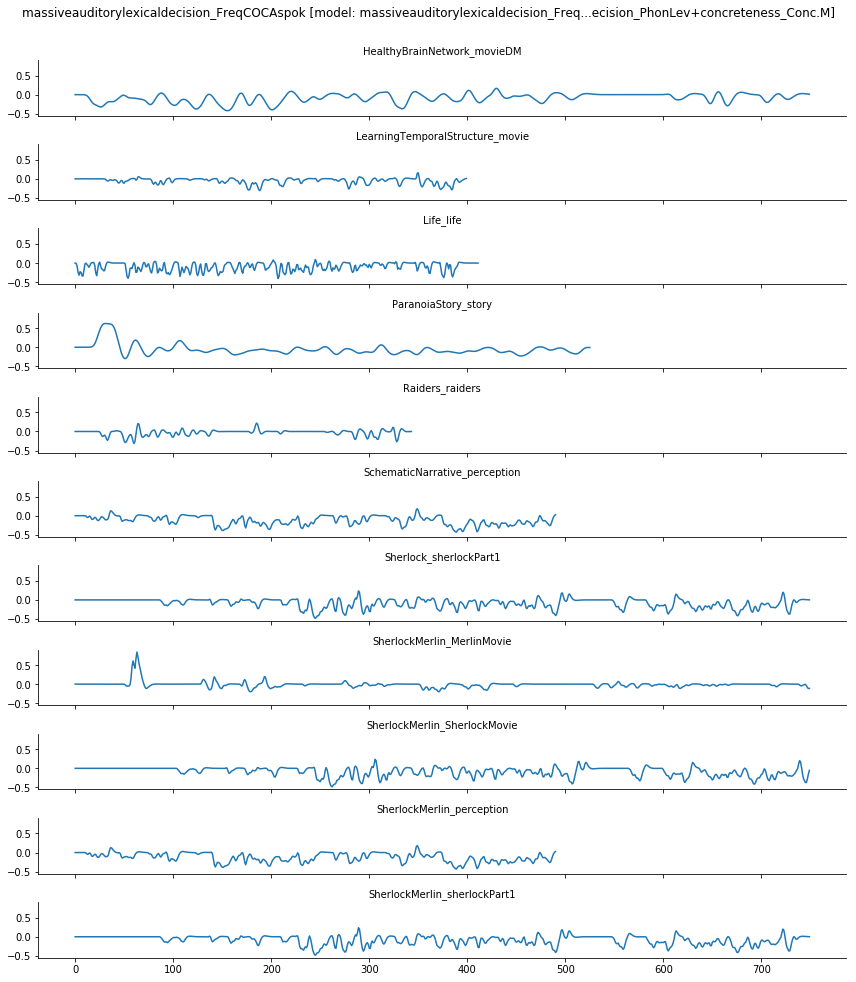

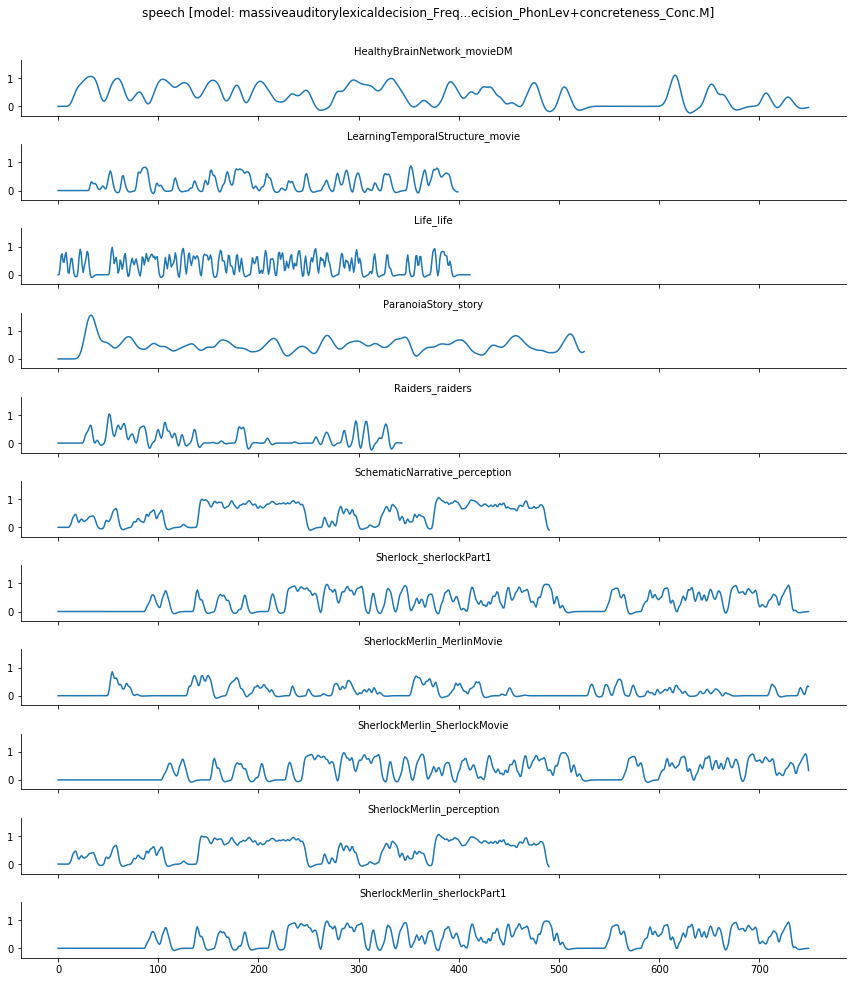

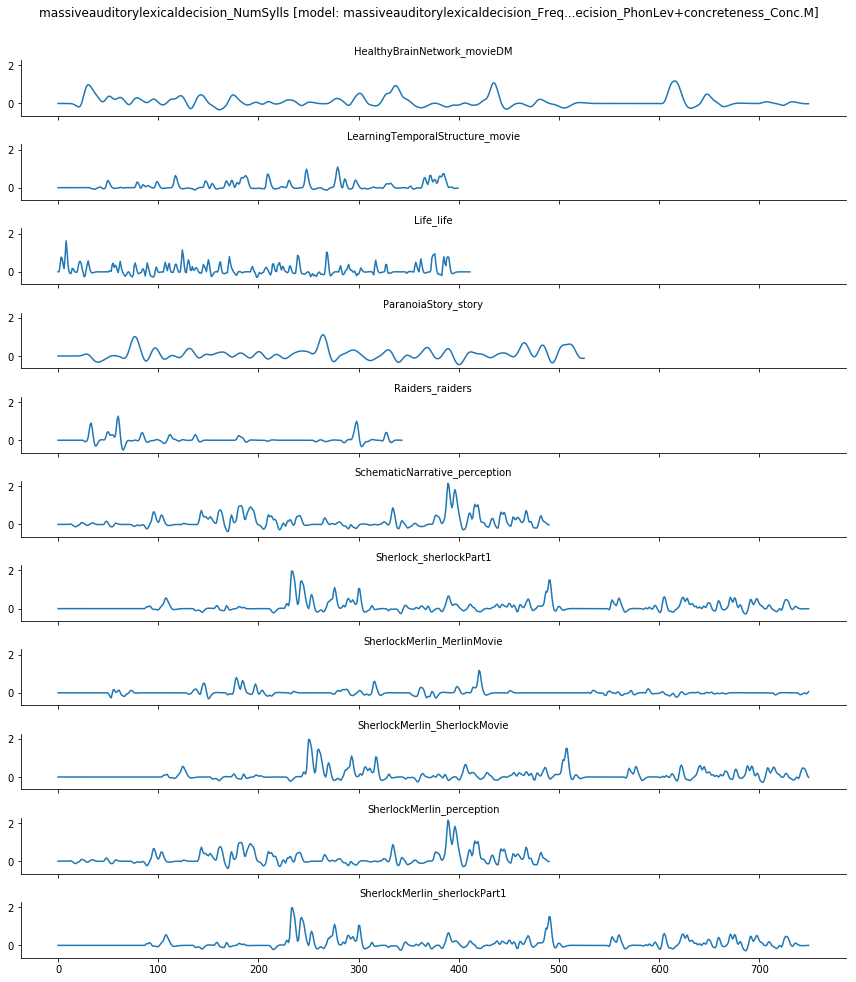

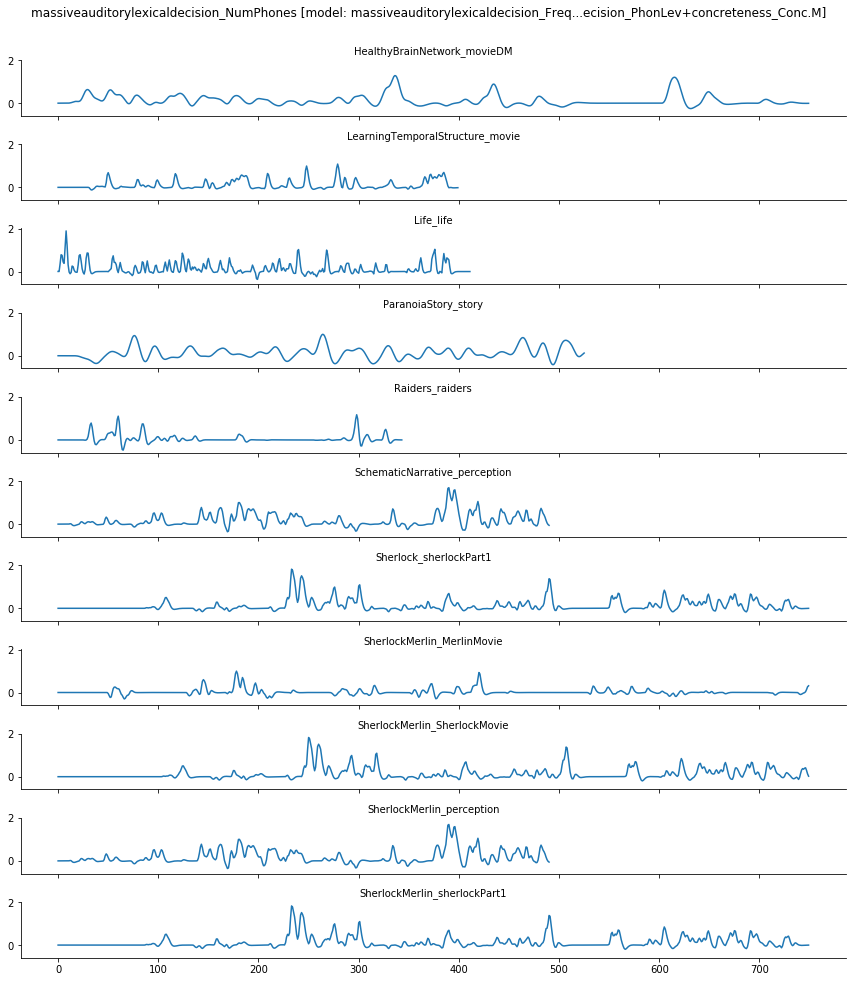

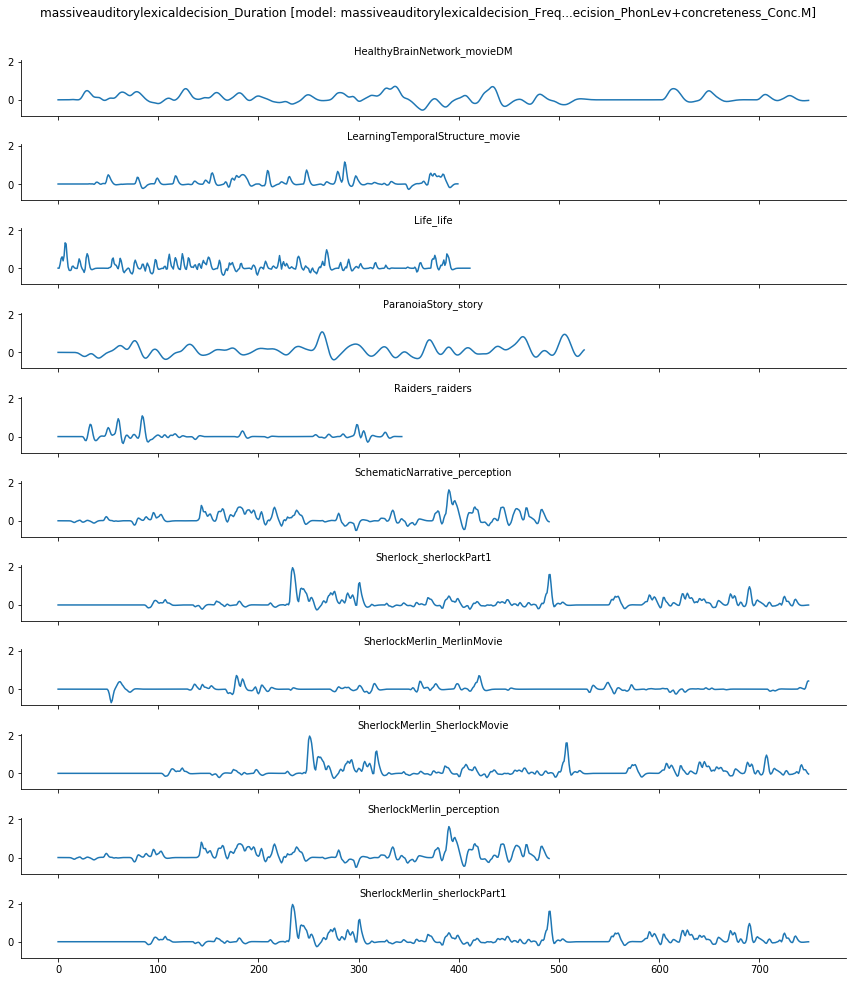

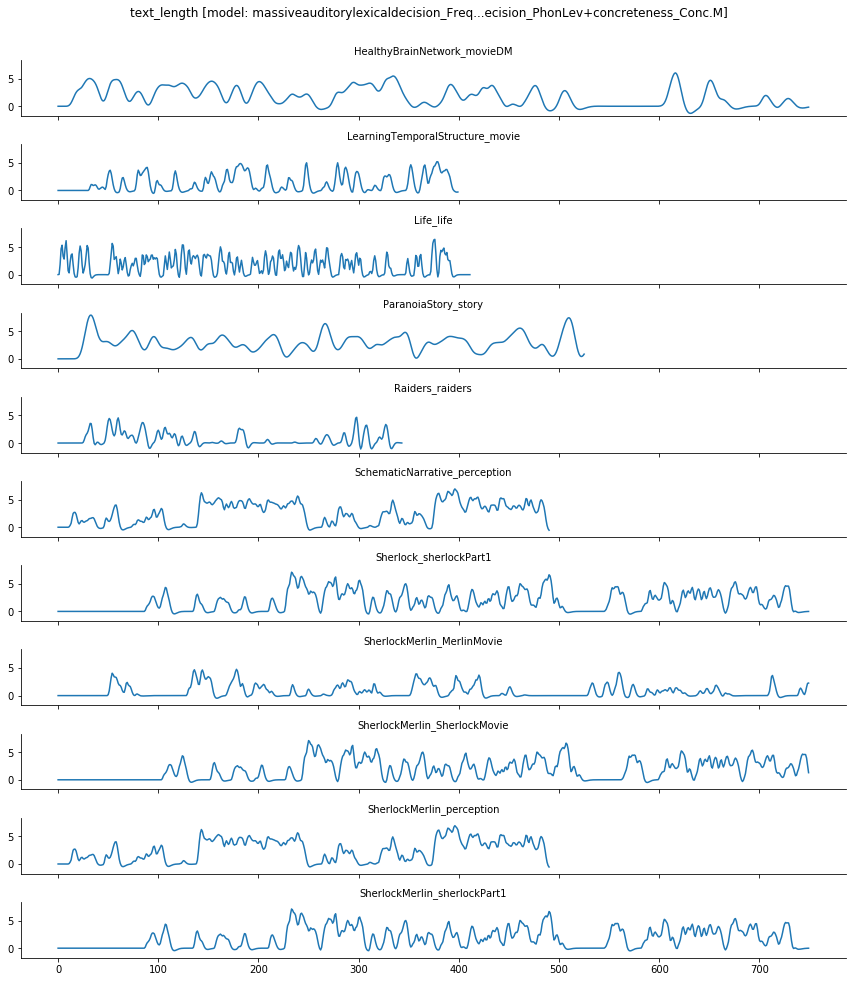

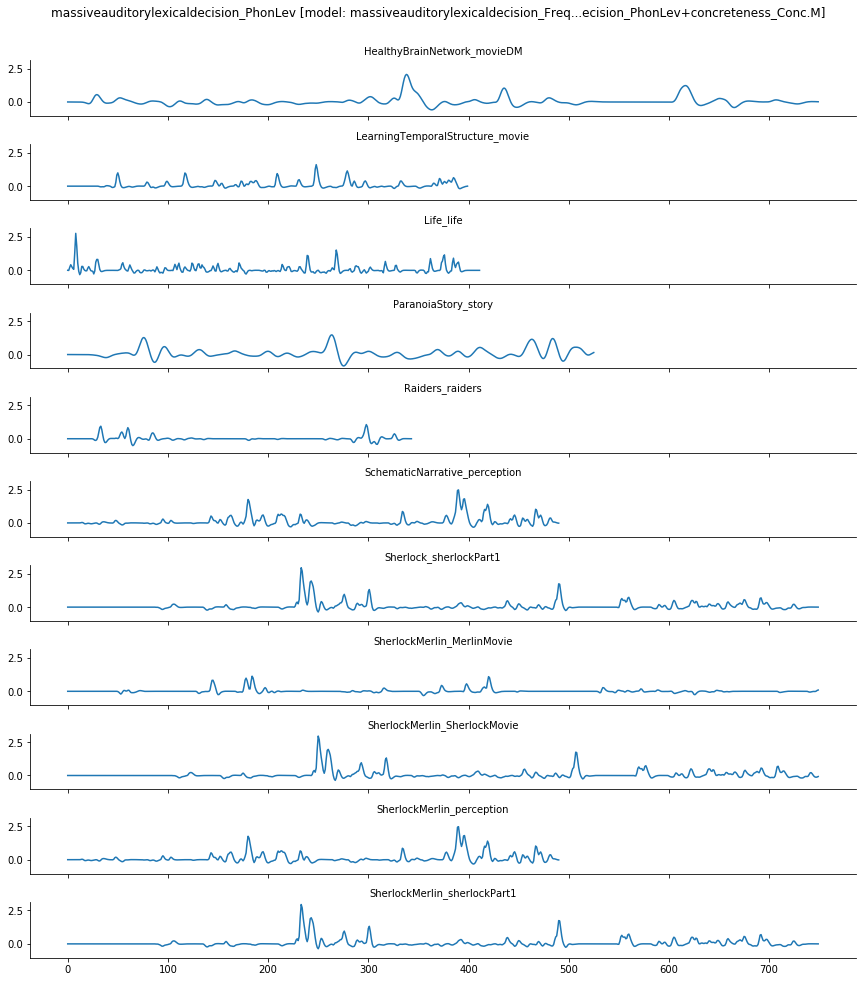

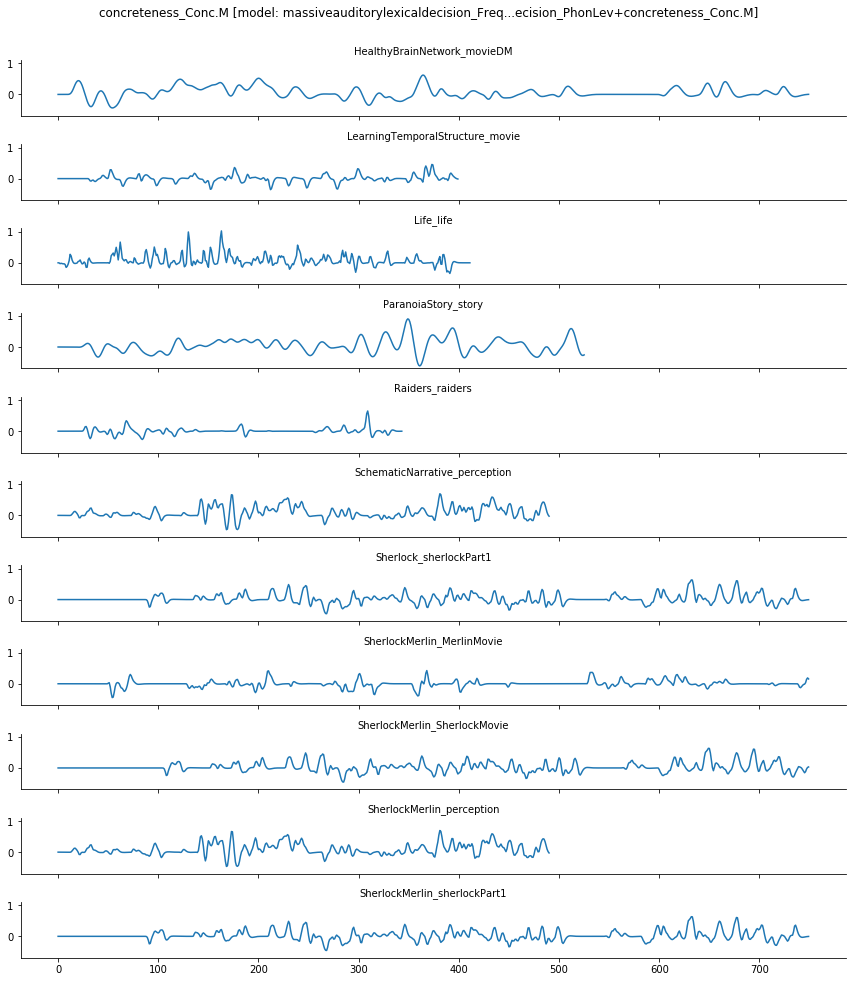

In [12]:
plot_regressor(plot_type='timeseries', df=df,
               predictors=predictors,
               models=['+'.join(predictors)],
               split_by='row', height=1.2, aspect=10)

In [13]:
agg_df = compute_metrics(df=df, aggfunc=[np.mean, np.std, np.var])

/home/alejandro/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


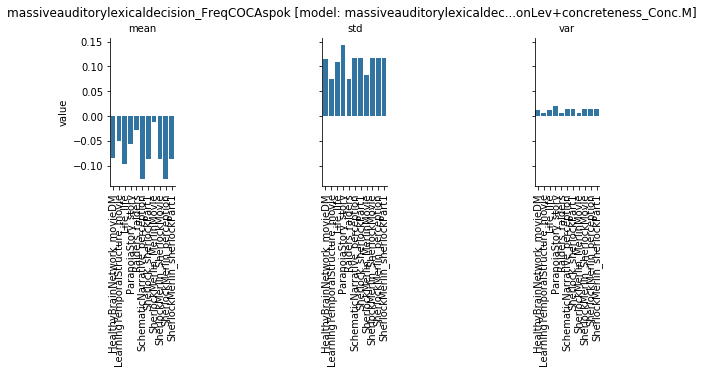

/home/alejandro/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


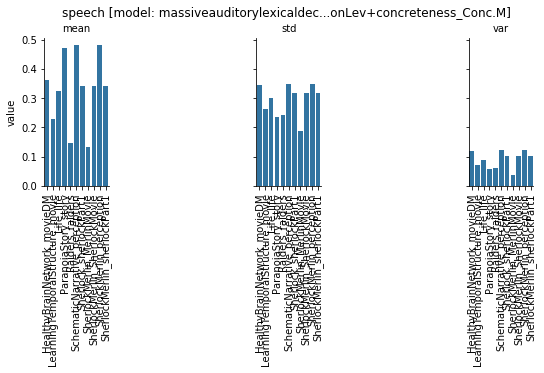

/home/alejandro/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


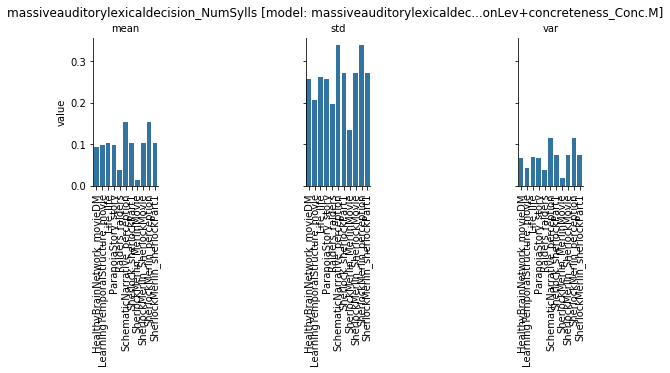

/home/alejandro/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


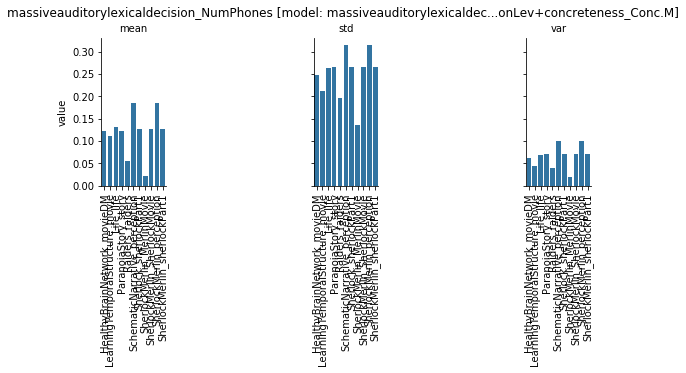

/home/alejandro/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


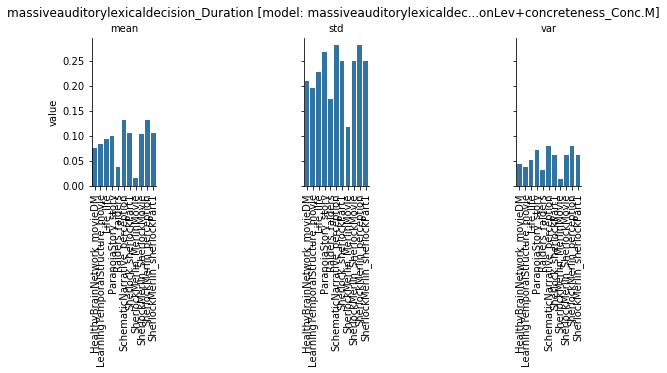

/home/alejandro/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


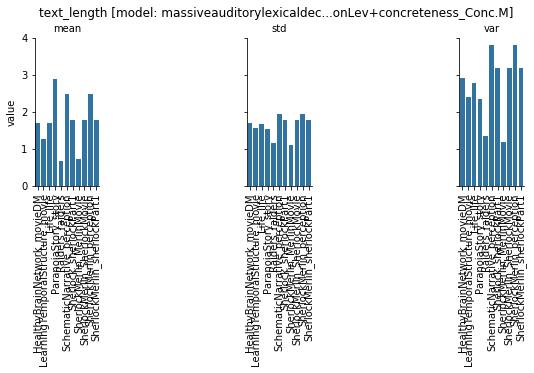

/home/alejandro/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


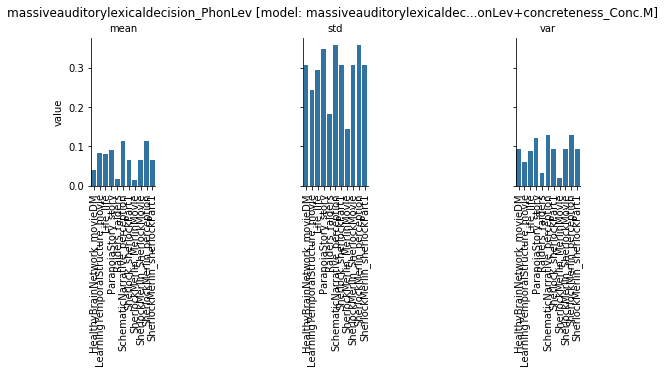

/home/alejandro/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


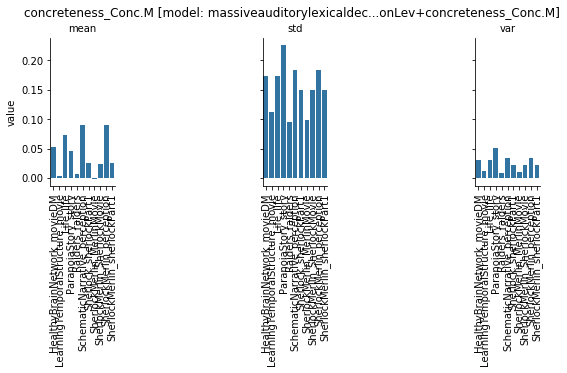

In [14]:
plot_metrics(agg_df, metrics=['mean', 'std', 'var'], 
             predictors=predictors,
             models=['+'.join(predictors)],
             sns_function='barplot', height=3, aspect=1)

## Compile models

In [73]:
for (pred, dataset, task), model in flatten_collection(incremental_models):
    if model.get_status()['status'] == 'DRAFT':
        model.compile()
    else:
        print(f'Status: {model.status} for {pred}, {dataset}, {task}')

Status: PASSED for massiveauditorylexicaldecision_FreqCOCAspok+speech, HealthyBrainNetwork, movieDM
Status: PASSED for massiveauditorylexicaldecision_FreqCOCAspok+speech, LearningTemporalStructure, movie
Status: PASSED for massiveauditorylexicaldecision_FreqCOCAspok+speech, Life, life
Status: PASSED for massiveauditorylexicaldecision_FreqCOCAspok+speech, ParanoiaStory, story
Status: PASSED for massiveauditorylexicaldecision_FreqCOCAspok+speech, Raiders, raiders
Status: PASSED for massiveauditorylexicaldecision_FreqCOCAspok+speech, SchematicNarrative, perception
Status: PASSED for massiveauditorylexicaldecision_FreqCOCAspok+speech, Sherlock, sherlockPart1
Status: PASSED for massiveauditorylexicaldecision_FreqCOCAspok+speech, SherlockMerlin, MerlinMovie
Status: PASSED for massiveauditorylexicaldecision_FreqCOCAspok+speech, SherlockMerlin, SherlockMovie
Status: PASSED for massiveauditorylexicaldecision_FreqCOCAspok+speech, SherlockMerlin, perception
Status: PASSED for massiveauditorylexic

## Results

In [10]:
flat_models = flatten_collection(incremental_models)

In [95]:
mis.get_status()

{'status': 'PENDING', 'traceback': ''}

No image for model: massiveauditorylexicaldecision_FreqCOCAspok


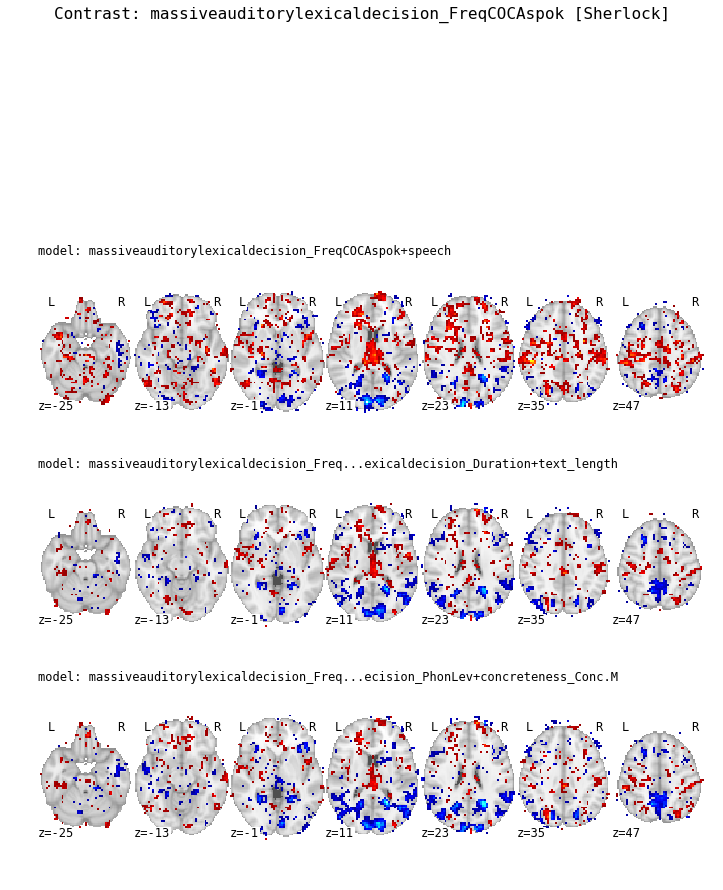

No image for model: massiveauditorylexicaldecision_FreqCOCAspok


KeyboardInterrupt: 

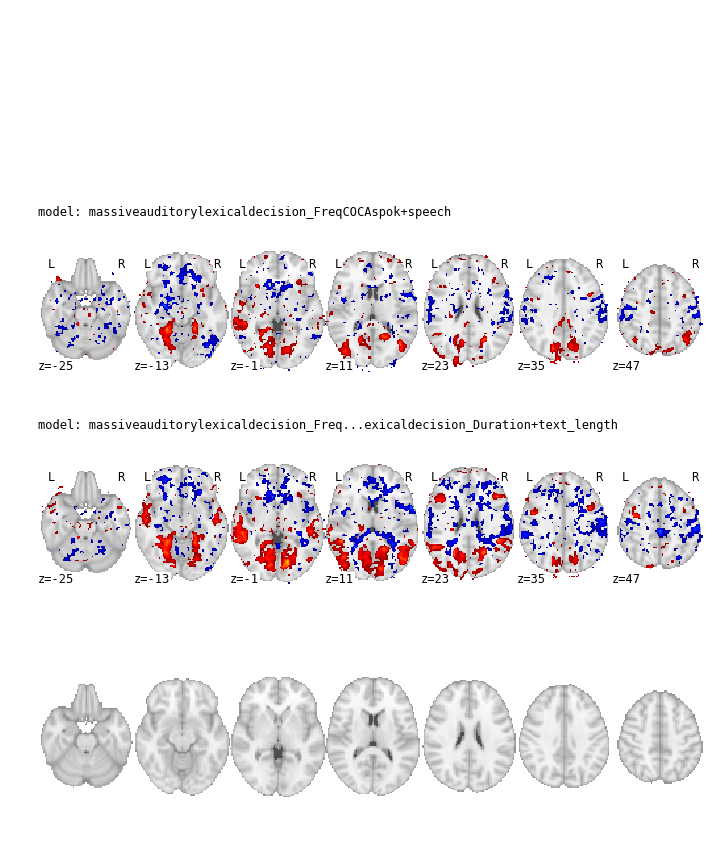

In [79]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_dataset(flat_models,
                         contrasts=[predictors[0]],
                         vmax=10, display_mode='z', figsize=(12,15),
                         threshold=1.96, colorbar=False)

In [17]:
plot_contrast_by_analysis(flat_models, contrasts=[predictors[0][0]],
                          models=['+'.join([item for sublist in predictors for item in sublist])],
                          vmax=10, draw_cross=True,
                          figsize=(15,12), colorbar=False,
                          threshold=1.96)

In [18]:
plot_analysis_grid(flat_models, contrasts=[item for sublist in predictors for item in sublist][0], vmax=10,
                    display_mode='z', colorbar=False,
                    cut_coords = [-15], draw_cross=True, figsize=(20, 20), threshold=1.96)